# Principal Component Analysis
[Lecture](https://courses.edx.org/courses/course-v1:Microsoft+DAT210x+4T2017/courseware/2776cb3b-a43e-6546-84fe-f1f68cd14465/5c186789-5bc3-8d2c-cf71-cd5baa39a289/?child=first)

Essentially setting a new coordinate system based on the direction data and spread.

[Lecture](https://courses.edx.org/courses/course-v1:Microsoft+DAT210x+4T2017/courseware/2776cb3b-a43e-6546-84fe-f1f68cd14465/5c186789-5bc3-8d2c-cf71-cd5baa39a289/?child=first)

In [1]:
import numpy as np

In [3]:
def computePCA(input_data):
    
    # Subtract mean of each feature from itself
    M = (input_data-input_data.T.mean(axis=1)).T
    
    # Compute covariance
    C = np.cov(M)
    
    # Compute eigen values + vectors
    latent, coeff = np.linalg.elg(C)
    
    # Sort
    index = np.argsort(latent)[::-1]
    
    # Sort by time-sorted
    coeff = coeff[:, index]
    latent = latent[index]
    
    return latent

# Use
[Lecture](https://courses.edx.org/courses/course-v1:Microsoft+DAT210x+4T2017/courseware/2776cb3b-a43e-6546-84fe-f1f68cd14465/5c186789-5bc3-8d2c-cf71-cd5baa39a289/?activate_block_id=block-v1%3AMicrosoft%2BDAT210x%2B4T2017%2Btype%40sequential%2Bblock%405c186789-5bc3-8d2c-cf71-cd5baa39a289)
* Various questions
 * How much did you enjoy the course
 * How informative were the lectures
 * Did you find the course challenging?
 
 * How prepared was the instructor
 * How available was the instructor during office hours?
 * How accurately did the instructor convey the material?
 
Note that the first three question are about the course, and the next three are about the instructor, and PCA tends to boil these kinds of sets down to single questions (in impact, within the data set).

More like:
* How awesome was the course?
* Did you like the instructor?

In [5]:
from sklearn.decomposition import PCA
import pandas as pd

In [6]:
pca = PCA(n_components = 2, svd_solver = 'full')

In [10]:
df = pd.read_csv('./Datasets/kidney_disease.csv', index_col=0)

# Limitations
Sensitive to feature scaling. It judges the importance of a feature by measuing feature variance. Features with larger magnitude of variance can dominate evaluated importance in PCA.
Normalize before applying PCA.

If you have too many features, PCA can bog down a little. See Scikit documentation for appropriate solvers based on your data set's characteristics. PCA will choose what it feels is the best solver based on your data set's dimensions (features and samples), but you may need to tweak it yourself.

Can't discern nonlinear or complex relationships between samples and features. You should probably consider a different dimensionality reduction algorithm.

Labs 1, 2, and 3

# Isomap
[Lecture](https://courses.edx.org/courses/course-v1:Microsoft+DAT210x+4T2017/courseware/2776cb3b-a43e-6546-84fe-f1f68cd14465/9ab453bc-aba3-0659-18e7-df4f41ab12c5/?child=first)

In [1]:
%matplotlib notebook

In [3]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

In [4]:
matplotlib.style.use('ggplot')

In [5]:
plane1 = []
plane2 = []
for i in range(20):
    for j in range(20):
        plane1.append([i, j, 0])
        if j > 0: plane2.append([i, j, j/2])
        
plane1 += plane2
plane1 = np.array(plane1, dtype=np.float64) + np.random.rand(780, 3) / 5

colors = []
for p in plane1:
    colors.append((p[2] + (20 - p[1])*0.2) / 30)

In [6]:
cmap = plt.get_cmap('jet')

<IPython.core.display.Javascript object>


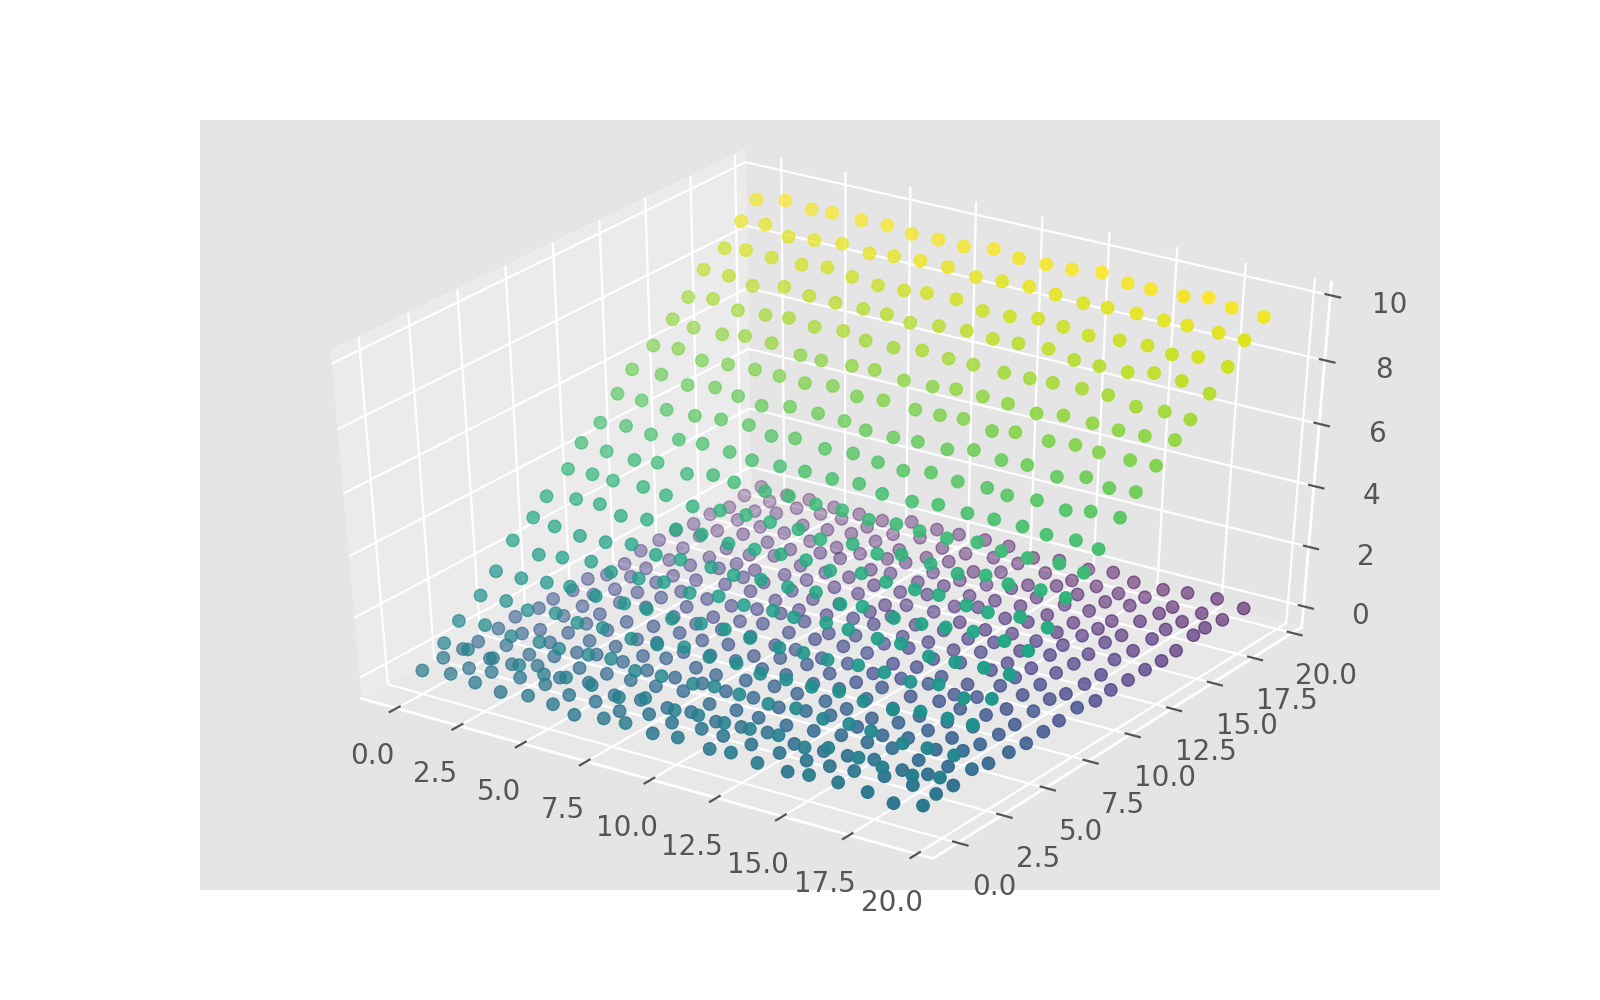

In [7]:
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(plane1[:, 0], plane1[:, 1], plane1[:, 2], c = colors, marker='o')


## PCA Dimensionality Reduction

In [8]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2, svd_solver='full')
T1 = pca.fit_transform(plane1)

<IPython.core.display.Javascript object>


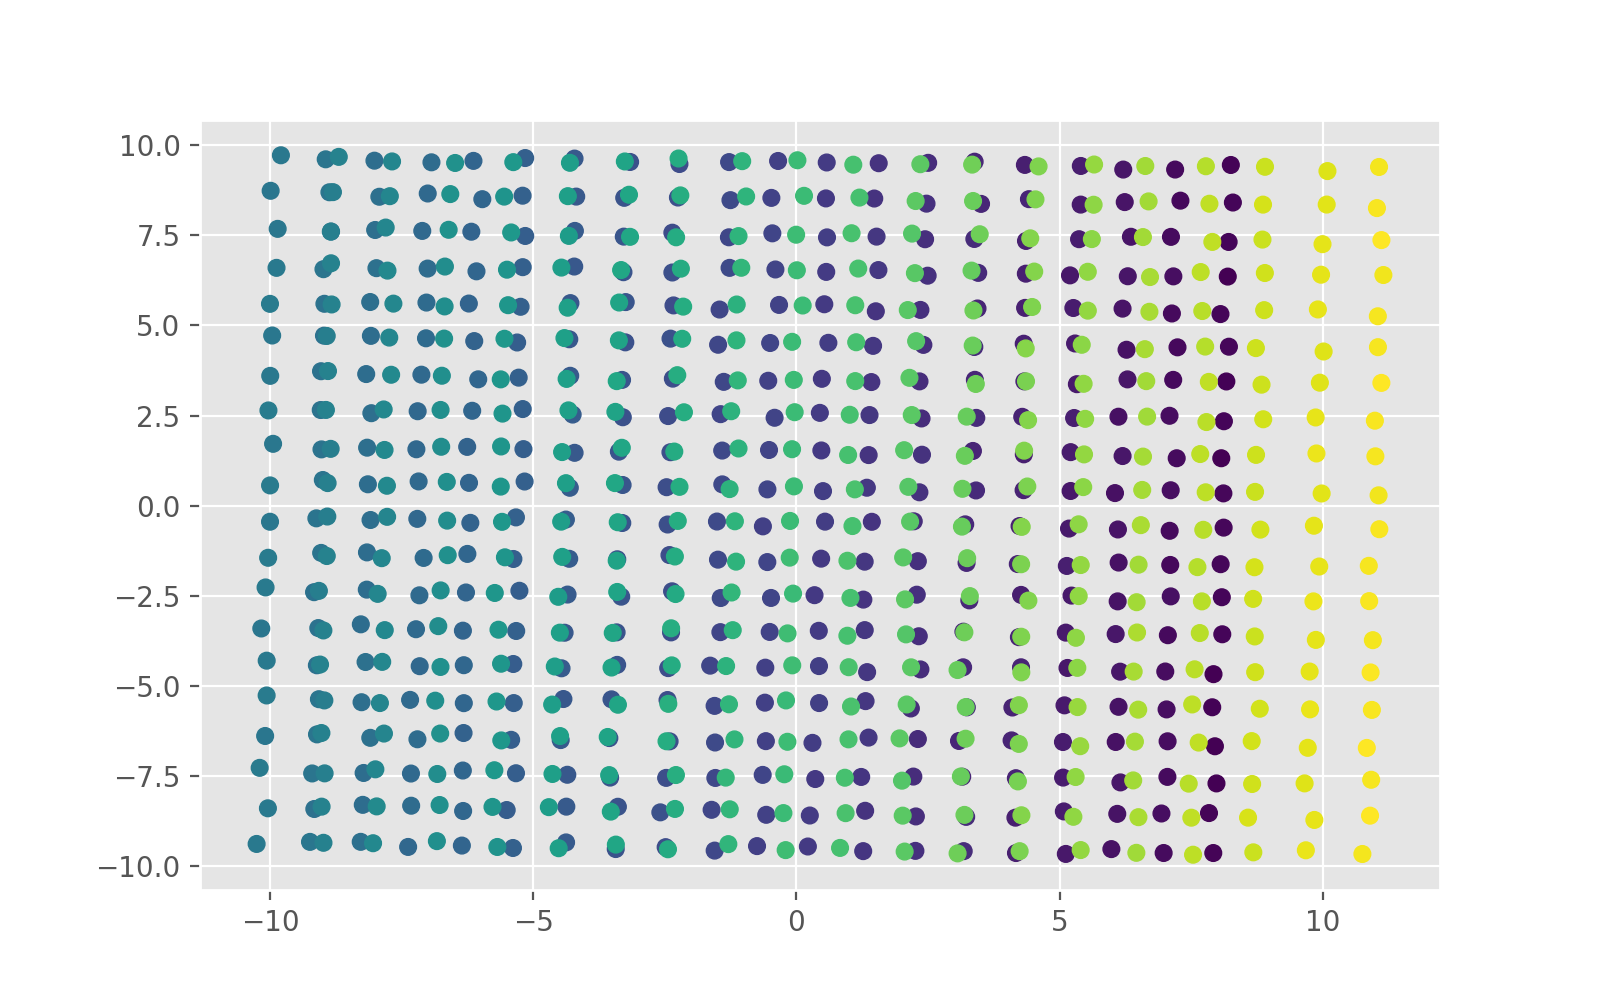

In [9]:
fig = plt.figure(figsize=(8, 5))
plt.scatter(x=T1[:, 0], y=T1[:, 1], c=colors)

The PCA generated projection makes us lose too much information. Our data is jumbled up, categories are lost, etc. However, Isomap should help sort it out a little.

## Isomap

In [11]:
from sklearn import manifold
iso = manifold.Isomap(n_neighbors=4, n_components=2)
T2 = iso.fit_transform(plane1)

<IPython.core.display.Javascript object>


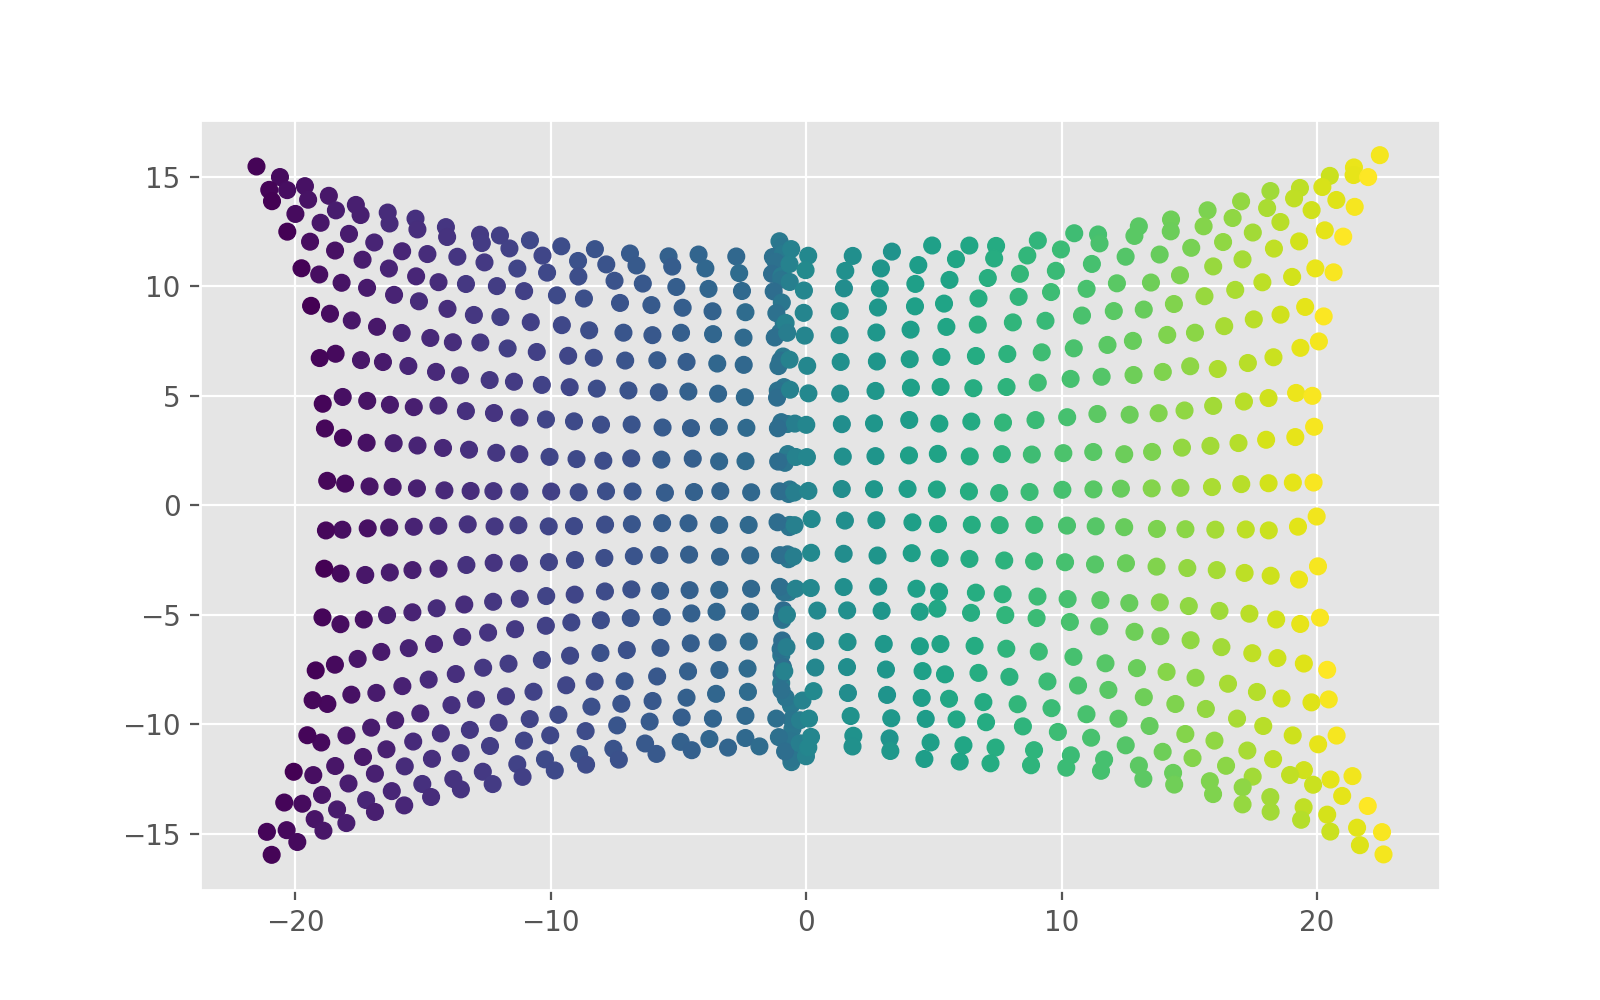

In [12]:
fig = plt.figure(figsize=(8, 5))
plt.scatter(x=T2[:, 0], y=T2[:, 1], c=colors)

Isomap generates some hinkiness at the hinge in the data because it calculates relationships according to the multidimensional neighborhood each observed feature is in. But otherwise is preserving some of the relationship data but flattening the set.

Isomap gets better for more bends in the data cohort shape and improves while PCA's usefulness decreases.

Real world examples would be movement in physical space, similarities between writing, or between symbols. Data/shapes with similarities but perturbations, etc.